In [13]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [14]:
versioninfo()

Julia Version 1.10.8
Commit 4c16ff44be8 (2025-01-22 10:06 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [15]:
]add UnitDiskMapping

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [16]:
import Pkg; Pkg.add("Graphs")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [17]:
import Pkg; Pkg.add("GenericTensorNetworks")
import Pkg; Pkg.add("LuxorGraphPlot")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [18]:
using UnitDiskMapping, Graphs, GenericTensorNetworks, LinearAlgebra
using UnitDiskMapping.LuxorGraphPlot.Luxor, LuxorGraphPlot

In [19]:
J = [
    0   132  168  228   60   12   24   48   96  192;
  132     0  616  836  220   44   88  176  352  704;
  168   616    0 1064  280   56  112  224  448  896;
  228   836 1064    0  380   76  152  304  608 1216;
   60   220  280  380    0   20   40   80  160  320;
   12    44   56   76   20    0    8   16   32   64;
   24    88  112  152   40    8    0   32   64  128;
   48   176  224  304   80   16   32    0  128  256;
   96   352  448  608  160   32   64  128    0  512;
  192   704  896 1216  320   64  128  256  512    0
]

10×10 Matrix{Int64}:
   0  132   168   228   60  12   24   48   96   192
 132    0   616   836  220  44   88  176  352   704
 168  616     0  1064  280  56  112  224  448   896
 228  836  1064     0  380  76  152  304  608  1216
  60  220   280   380    0  20   40   80  160   320
  12   44    56    76   20   0    8   16   32    64
  24   88   112   152   40   8    0   32   64   128
  48  176   224   304   80  16   32    0  128   256
  96  352   448   608  160  32   64  128    0   512
 192  704   896  1216  320  64  128  256  512     0

In [20]:
h=[-302, -949, -1074, -1259, -486, -102, -200, -384, -704, -1152]

10-element Vector{Int64}:
  -302
  -949
 -1074
 -1259
  -486
  -102
  -200
  -384
  -704
 -1152

In [21]:
qubo = UnitDiskMapping.map_qubo(J, h);

In [22]:
qubo_graph, qubo_weights = UnitDiskMapping.graph_and_weights(qubo.grid_graph)

(SimpleGraph{Int64}(726, [[2, 3], [1, 3, 5, 6, 7], [1, 2, 4, 6, 7], [3, 7, 8], [2, 6], [2, 3, 5, 7, 9], [2, 3, 4, 6, 9], [4, 10], [6, 7, 11], [8, 12]  …  [338, 339, 340, 366, 376], [342, 343], [345, 346], [348, 349], [351, 352], [354, 355], [357, 358], [360, 361], [363, 364], [366, 367]]), [-301, -128, 136, 2, -948, 136, -128, 2, 2, 2  …  -508, 303, 950, 1075, 1260, 487, 103, 201, 385, 705])

In [23]:
show(qubo_graph)

SimpleGraph{Int64}(726, [[2, 3], [1, 3, 5, 6, 7], [1, 2, 4, 6, 7], [3, 7, 8], [2, 6], [2, 3, 5, 7, 9], [2, 3, 4, 6, 9], [4, 10], [6, 7, 11], [8, 12], [9, 13, 14], [10, 16, 17], [11, 14, 19, 20, 21], [11, 13, 15, 20, 21], [14, 21, 22], [12, 17, 22, 23, 24], [12, 16, 18, 23, 24], [17, 24, 25], [13, 20], [13, 14, 19, 21, 26], [13, 14, 15, 20, 26], [15, 16, 23], [16, 17, 22, 24, 27], [16, 17, 18, 23, 27], [18, 28], [20, 21, 29], [23, 24, 30], [25, 31], [26, 32, 33], [27, 35, 36], [28, 38, 39], [29, 33, 41, 42, 43], [29, 32, 34, 42, 43], [33, 43, 44], [30, 36, 44, 45, 46], [30, 35, 37, 45, 46], [36, 46, 47], [31, 39, 47, 48, 49], [31, 38, 40, 48, 49], [39, 49, 50], [32, 42], [32, 33, 41, 43, 51], [32, 33, 34, 42, 51], [34, 35, 45], [35, 36, 44, 46, 52], [35, 36, 37, 45, 52], [37, 38, 48], [38, 39, 47, 49, 53], [38, 39, 40, 48, 53], [40, 54], [42, 43, 55], [45, 46, 56], [48, 49, 57], [50, 58], [51, 59, 60], [52, 62, 63], [53, 65, 66], [54, 68, 69], [55, 60, 71, 72, 73], [55, 59, 61, 72, 73],

In [30]:
# prompt: I want to know all the attributes the qubo object

fieldnames(typeof(qubo))


(:grid_graph, :pins, :mis_overhead)

In [33]:

fieldnames(typeof(qubo.grid_graph))


(:size, :nodes, :radius)

In [12]:
a=qubo.grid_graph.nodes

376-element Vector{WeightedNode{Int64}}:
 WeightedNode{Int64}((2, 1), -301)
 WeightedNode{Int64}((2, 2), -128)
 WeightedNode{Int64}((3, 2), 136)
 WeightedNode{Int64}((4, 2), 2)
 WeightedNode{Int64}((1, 3), -948)
 WeightedNode{Int64}((2, 3), 136)
 WeightedNode{Int64}((3, 3), -128)
 WeightedNode{Int64}((5, 3), 2)
 WeightedNode{Int64}((3, 4), 2)
 WeightedNode{Int64}((6, 4), 2)
 WeightedNode{Int64}((2, 5), 2)
 WeightedNode{Int64}((6, 5), 2)
 WeightedNode{Int64}((2, 6), -164)
 ⋮
 WeightedNode{Int64}((33, 35), 2)
 WeightedNode{Int64}((34, 35), 516)
 WeightedNode{Int64}((35, 35), -508)
 WeightedNode{Int64}((3, 36), 303)
 WeightedNode{Int64}((7, 36), 950)
 WeightedNode{Int64}((11, 36), 1075)
 WeightedNode{Int64}((15, 36), 1260)
 WeightedNode{Int64}((19, 36), 487)
 WeightedNode{Int64}((23, 36), 103)
 WeightedNode{Int64}((27, 36), 201)
 WeightedNode{Int64}((31, 36), 385)
 WeightedNode{Int64}((35, 36), 705)

In [43]:

node_dict = Dict()

# Iterate over the nodes in the graph
for node in vertices(qubo_graph)
  # Get the coordinates of the node
  coordinates = qubo.grid_graph.nodes[node]

  # Store the node and its coordinates in the dictionary
  node_dict[node] = coordinates
end

# Print the dictionary
println(node_dict)


# Print the weights
println(qubo_weights)

Dict{Any, Any}(56 => WeightedNode{Int64}((6, 13), 2), 35 => WeightedNode{Int64}((6, 10), -832), 60 => WeightedNode{Int64}((3, 14), 64), 220 => WeightedNode{Int64}((15, 27), -300), 308 => WeightedNode{Int64}((14, 33), 2), 67 => WeightedNode{Int64}((12, 14), 2), 215 => WeightedNode{Int64}((9, 27), 2), 73 => WeightedNode{Int64}((3, 15), -56), 319 => WeightedNode{Int64}((8, 34), 2), 251 => WeightedNode{Int64}((7, 30), 356), 115 => WeightedNode{Int64}((9, 19), 2), 112 => WeightedNode{Int64}((5, 19), 2), 185 => WeightedNode{Int64}((18, 25), 2), 348 => WeightedNode{Int64}((10, 35), 900), 365 => WeightedNode{Int64}((33, 35), 2), 333 => WeightedNode{Int64}((27, 34), 132), 86 => WeightedNode{Int64}((11, 16), 2), 168 => WeightedNode{Int64}((18, 23), 44), 364 => WeightedNode{Int64}((31, 35), -252), 207 => WeightedNode{Int64}((27, 26), 36), 263 => WeightedNode{Int64}((23, 30), 36), 242 => WeightedNode{Int64}((14, 29), 2), 183 => WeightedNode{Int64}((10, 25), 2), 376 => WeightedNode{Int64}((35, 36),

In [44]:

# Extract coordinates into an array
coordinates_array = [qubo.grid_graph.nodes[i] for i in vertices(qubo_graph)]

# Print the coordinates
println("Coordinates:")
println(coordinates_array)

# Print the weights
println("\nWeights:")
println(qubo_weights)

Coordinates:
WeightedNode{Int64}[WeightedNode{Int64}((2, 1), -301), WeightedNode{Int64}((2, 2), -128), WeightedNode{Int64}((3, 2), 136), WeightedNode{Int64}((4, 2), 2), WeightedNode{Int64}((1, 3), -948), WeightedNode{Int64}((2, 3), 136), WeightedNode{Int64}((3, 3), -128), WeightedNode{Int64}((5, 3), 2), WeightedNode{Int64}((3, 4), 2), WeightedNode{Int64}((6, 4), 2), WeightedNode{Int64}((2, 5), 2), WeightedNode{Int64}((6, 5), 2), WeightedNode{Int64}((2, 6), -164), WeightedNode{Int64}((3, 6), 172), WeightedNode{Int64}((4, 6), 2), WeightedNode{Int64}((6, 6), -612), WeightedNode{Int64}((7, 6), 620), WeightedNode{Int64}((8, 6), 2), WeightedNode{Int64}((1, 7), -1073), WeightedNode{Int64}((2, 7), 172), WeightedNode{Int64}((3, 7), -164), WeightedNode{Int64}((5, 7), 2), WeightedNode{Int64}((6, 7), 620), WeightedNode{Int64}((7, 7), -612), WeightedNode{Int64}((9, 7), 2), WeightedNode{Int64}((3, 8), 2), WeightedNode{Int64}((7, 8), 2), WeightedNode{Int64}((10, 8), 2), WeightedNode{Int64}((2, 9), 2)

In [1]:

# Access coordinates of each node directly
for node in vertices(qubo_graph)
    println("Node: ", node, ", Coordinates: ", qubo.grid_graph.nodes[node])
end

LoadError: UndefVarError: `vertices` not defined

In [1]:

qubo_graph, qubo_weights = UnitDiskMapping.graph_and_weights(qubo.grid_graph)


# Extract coordinates into an array
coordinates_array = [qubo.grid_graph.nodes[i] for i in vertices(qubo_graph)]

# Print the coordinates
println(coordinates_array)

LoadError: UndefVarError: `UnitDiskMapping` not defined

In [ ]:
# prompt: get the coordinates from the weighted node{64}

println(node_dict[64])

In [48]:

fieldnames(typeof(qubo.grid_graph.nodes))


()

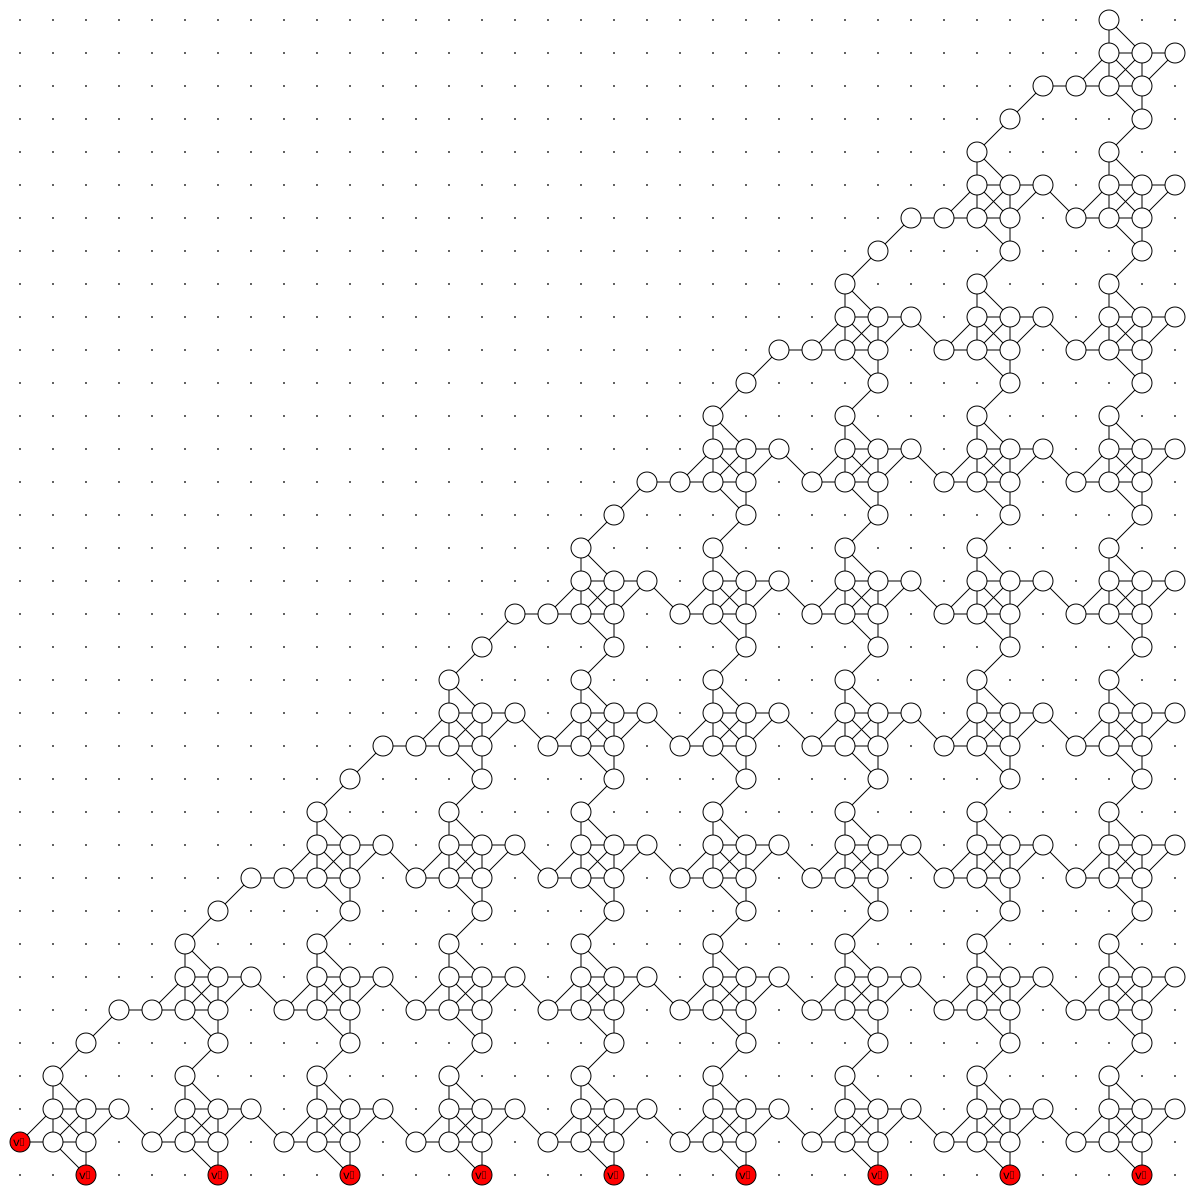

In [13]:
show_pins(qubo)

In [14]:
qubo_mapped_solution = collect(Int, solve(GenericTensorNetwork(IndependentSet(qubo_graph, qubo_weights)), SingleConfigMax())[].c.data)

376-element Vector{Int64}:
 0
 0
 0
 1
 0
 1
 0
 0
 0
 1
 1
 0
 0
 ⋮
 1
 0
 0
 1
 1
 1
 1
 1
 1
 1
 1
 1

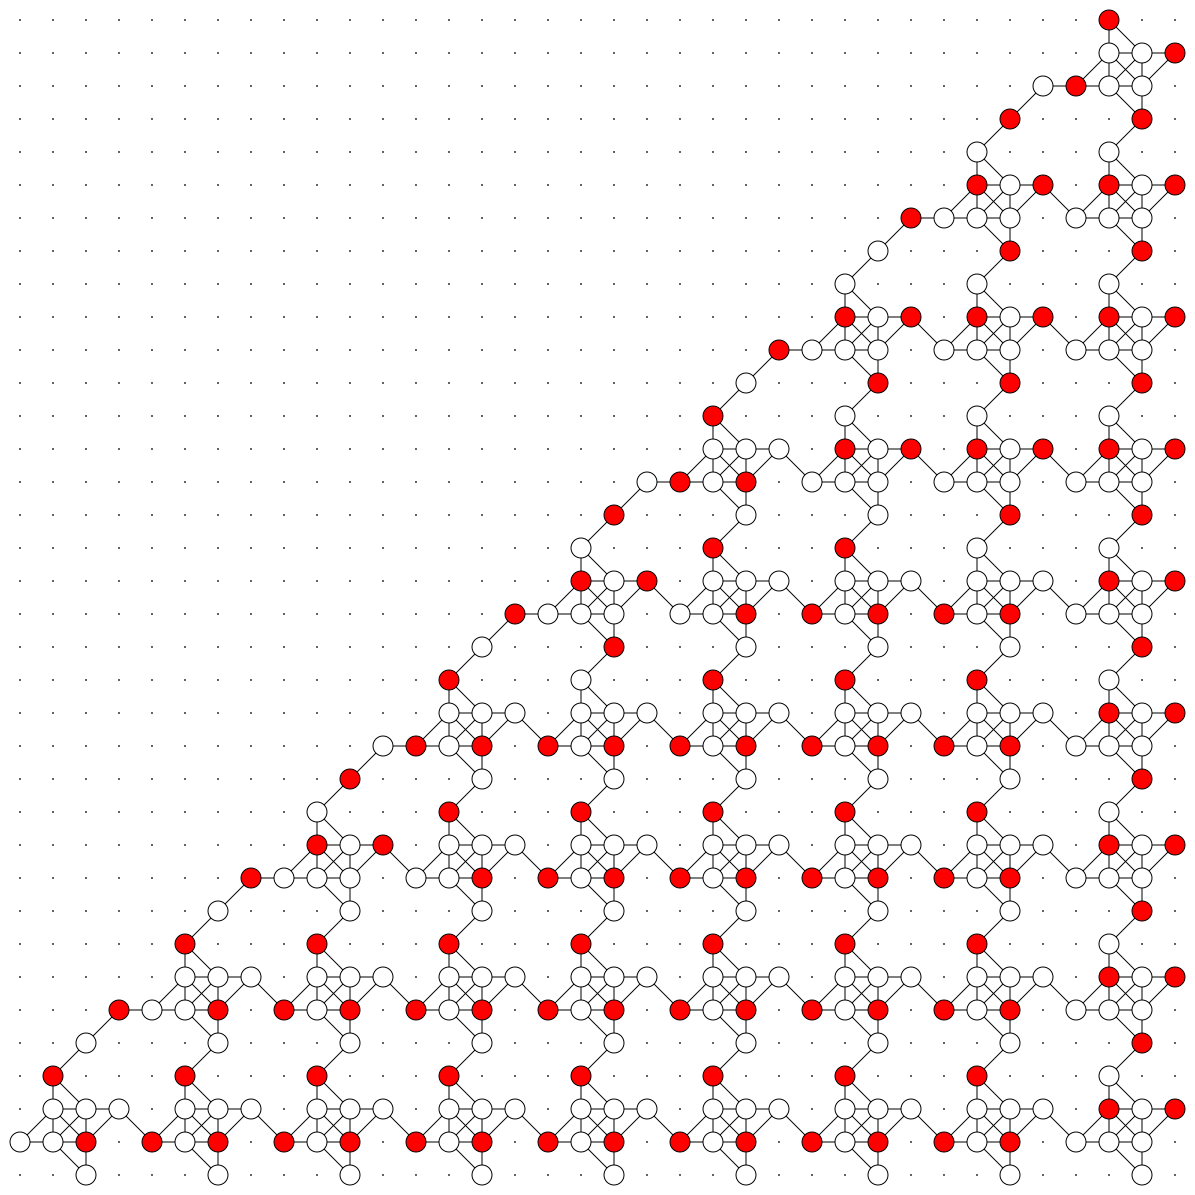

In [15]:
show_config(qubo.grid_graph, qubo_mapped_solution)